<a href="https://colab.research.google.com/github/devphillipe/resolucao-challenge-alura-store/blob/main/Resolu%C3%A7%C3%A3o_Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [65]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [54]:
import pandas as pd

# URLs dos arquivos CSV
files = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv", "Loja 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv", "Loja 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv", "Loja 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv", "Loja 4")
]

# Lista para armazenar os DataFrames
dataframes = []

# Ler os arquivos e adicionar ID e nome da loja
for idx, (url, loja_nome) in enumerate(files, start=1):
    df = pd.read_csv(url)
    df["ID_Loja"] = idx
    df["Nome_Loja"] = loja_nome
    dataframes.append(df)

# Concatenar os dados em um único DataFrame
df_consolidado = pd.concat(dataframes, ignore_index=True)
df_consolidado.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,ID_Loja,Nome_Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1,Loja 1


In [56]:
# Calcular o faturamento de cada loja (preço + frete)
df_consolidado["Faturamento"] = df_consolidado["Preço"] + df_consolidado["Frete"]

# Agrupar por loja e somar o faturamento
faturamento_lojas = df_consolidado.groupby(["ID_Loja", "Nome_Loja"])["Faturamento"].sum().reset_index()

# Formatar para moeda BRL
faturamento_lojas["Faturamento (BRL)"] = faturamento_lojas["Faturamento"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

faturamento_lojas[["ID_Loja", "Nome_Loja", "Faturamento (BRL)"]]


,ID_Loja,Nome_Loja,Faturamento (BRL)
0,1,Loja 1,"R$ 1.616.347,09"
1,2,Loja 2,"R$ 1.567.773,22"
2,3,Loja 3,"R$ 1.542.047,69"
3,4,Loja 4,"R$ 1.458.253,46"


#Gráfico de Pizza - Faturamento por Loja

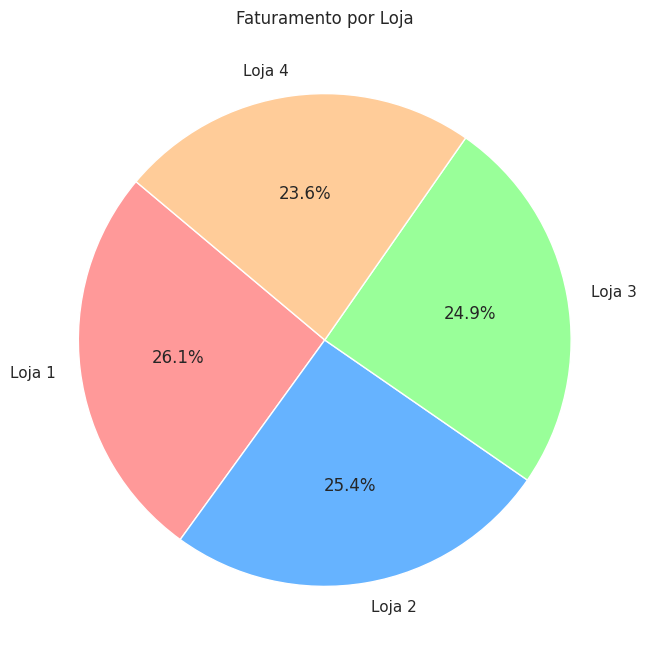

In [66]:
# Gráfico de Pizza - Faturamento por Loja
plt.figure(figsize=(8, 8))
plt.pie(faturamento_lojas["Faturamento"], labels=faturamento_lojas["Nome_Loja"], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Faturamento por Loja')
plt.show()


# 2. Vendas por Categoria


In [60]:
# Calcular o faturamento
df_consolidado["Faturamento"] = df_consolidado["Preço"] + df_consolidado["Frete"]

# Agrupar por categoria e somar o faturamento
vendas_por_categoria = df_consolidado.groupby("Categoria do Produto")["Faturamento"].sum().reset_index()

# Formatar para moeda BRL
vendas_por_categoria["Faturamento (BRL)"] = vendas_por_categoria["Faturamento"].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

# Ordenar do maior para o menor
vendas_por_categoria = vendas_por_categoria.sort_values(by="Faturamento", ascending=False)

# Exibir resultado
vendas_por_categoria[["Categoria do Produto", "Faturamento (BRL)"]]


,Categoria do Produto,Faturamento (BRL)
2,eletronicos,"R$ 2.332.048,08"
1,eletrodomesticos,"R$ 1.860.198,66"
6,moveis,"R$ 1.064.149,77"
4,instrumentos musicais,"R$ 489.701,48"
3,esporte e lazer,"R$ 200.891,94"
0,brinquedos,"R$ 103.502,36"
7,utilidades domesticas,"R$ 80.921,72"
5,livros,"R$ 53.007,43"


#Gráfico de Barras - Vendas por Categoria

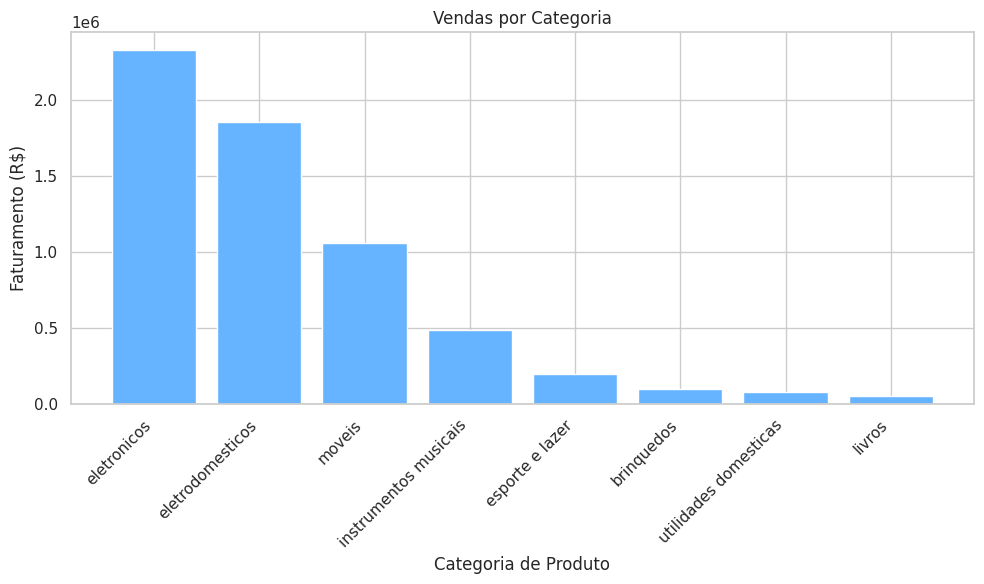

In [68]:
# Gráfico de Barras - Vendas por Categoria
plt.figure(figsize=(10, 6))
plt.bar(vendas_por_categoria["Categoria do Produto"], vendas_por_categoria["Faturamento"], color='#66b3ff')
plt.xlabel('Categoria de Produto')
plt.ylabel('Faturamento (R$)')
plt.title('Vendas por Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [61]:

# Converter coluna de avaliação para numérica, caso esteja como string
df_consolidado["Avaliação da compra"] = pd.to_numeric(df_consolidado["Avaliação da compra"], errors='coerce')

# Agrupar por loja e calcular a média da avaliação
media_avaliacoes = df_consolidado.groupby(["ID_Loja", "Nome_Loja"])["Avaliação da compra"].mean().reset_index()

# Arredondar para duas casas decimais
media_avaliacoes["Média de Avaliação"] = media_avaliacoes["Avaliação da compra"].round(2)

# Exibir apenas o necessário
media_avaliacoes = media_avaliacoes[["ID_Loja", "Nome_Loja", "Média de Avaliação"]]
media_avaliacoes


,ID_Loja,Nome_Loja,Média de Avaliação
0,1,Loja 1,3.98
1,2,Loja 2,4.04
2,3,Loja 3,4.05
3,4,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [62]:
# Contar quantas vezes cada produto foi vendido
vendas_por_produto = df_consolidado["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Produto mais vendido
mais_vendido = vendas_por_produto.iloc[0]

# Produto menos vendido (pode haver empates, pega o último da lista)
menos_vendido = vendas_por_produto.iloc[-1]

# Mostrar os resultados
print("🔝 Produto Mais Vendido:")
print(mais_vendido)
print("\n🔻 Produto Menos Vendido:")
print(menos_vendido)


🔝 Produto Mais Vendido:
Produto                 Cômoda
Quantidade de Vendas       210
Name: 0, dtype: object

🔻 Produto Menos Vendido:
Produto                 Celular ABXY
Quantidade de Vendas             157
Name: 50, dtype: object


# 5. Frete Médio por Loja


In [63]:

# Garantir que a coluna Frete está como número
df_consolidado["Frete"] = pd.to_numeric(df_consolidado["Frete"], errors="coerce")

# Calcular o frete médio por loja
frete_medio = df_consolidado.groupby(["ID_Loja", "Nome_Loja"])["Frete"].mean().reset_index()

# Arredondar para 2 casas decimais
frete_medio["Frete Médio (R$)"] = frete_medio["Frete"].round(2)

# Exibir apenas o necessário
frete_medio = frete_medio[["ID_Loja", "Nome_Loja", "Frete Médio (R$)"]]
frete_medio


,ID_Loja,Nome_Loja,Frete Médio (R$)
0,1,Loja 1,34.69
1,2,Loja 2,33.62
2,3,Loja 3,33.07
3,4,Loja 4,31.28


#Gráfico de Linhas - Frete Médio por Loja

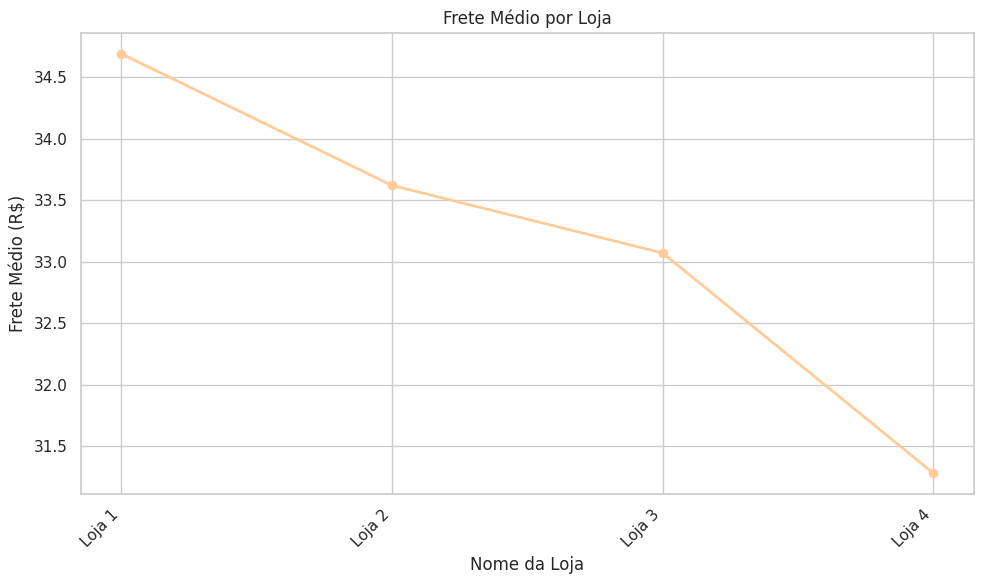

In [70]:
# Gráfico de Linhas - Frete Médio por Loja
plt.figure(figsize=(10, 6))
plt.plot(frete_medio["Nome_Loja"], frete_medio["Frete Médio (R$)"], marker='o', color='#ffcc99', linestyle='-', linewidth=2)
plt.xlabel('Nome da Loja')
plt.ylabel('Frete Médio (R$)')
plt.title('Frete Médio por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Qual loja vender?

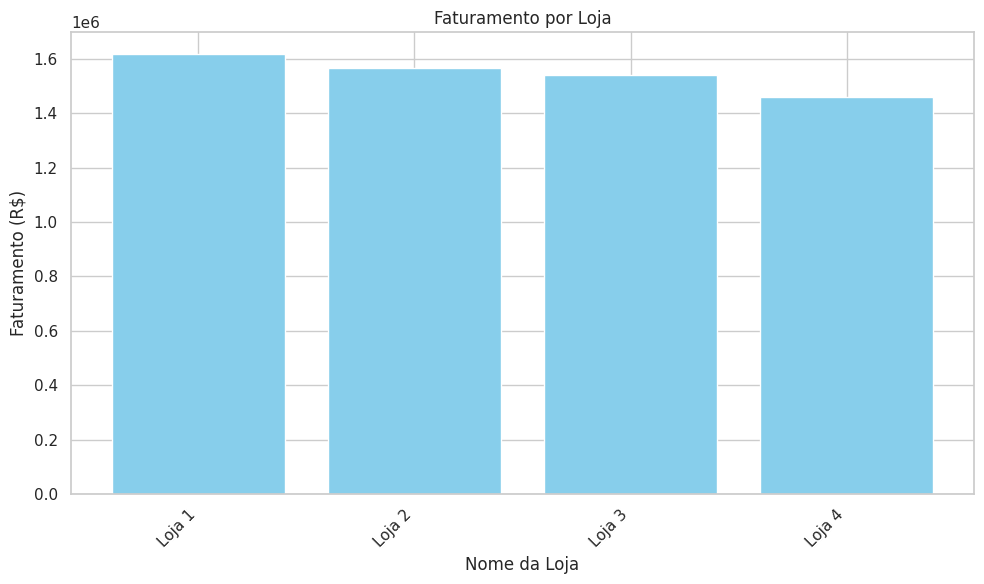

,Nome_Loja,Faturamento (BRL),Avaliação da compra,Frete Médio (BRL)
0,Loja 1,"R$ 1.616.347,09",4.0,"R$ 34,69"
1,Loja 2,"R$ 1.567.773,22",4.0,"R$ 33,62"
2,Loja 3,"R$ 1.542.047,69",4.0,"R$ 33,07"
3,Loja 4,"R$ 1.458.253,46",4.0,"R$ 31,28"


In [79]:
# 1. Faturamento por loja
faturamento_lojas = df_consolidado.groupby(
    ["ID_Loja", "Nome_Loja"]
)["Faturamento"].sum().reset_index()

# 2. Média de avaliação por loja (arredondando para 1 casa decimal)
media_avaliacoes = df_consolidado.groupby(
    ["ID_Loja", "Nome_Loja"]
)["Avaliação da compra"].mean().reset_index()
media_avaliacoes["Avaliação da compra"] = media_avaliacoes["Avaliação da compra"].round(1)

# 3. Frete médio por loja
frete_medio = df_consolidado.groupby(
    ["ID_Loja", "Nome_Loja"]
)["Frete"].mean().reset_index()

# Unir tudo
analise_lojas = (
    faturamento_lojas
    .merge(media_avaliacoes, on=["ID_Loja", "Nome_Loja"])
    .merge(frete_medio, on=["ID_Loja", "Nome_Loja"])
    .sort_values(by="Faturamento", ascending=False)
)

# Formatar colunas em BRL (strings)
analise_lojas["Faturamento (BRL)"] = analise_lojas["Faturamento"] \
    .apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
analise_lojas["Frete Médio (BRL)"] = analise_lojas["Frete"] \
    .apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# --- Gráfico corrigido usando a coluna numérica ---
plt.figure(figsize=(10, 6))
plt.bar(
    analise_lojas["Nome_Loja"],
    analise_lojas["Faturamento"],      # aqui usamos o valor numérico original
    color='skyblue'
)
plt.xlabel('Nome da Loja')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar a tabela formatada
analise_lojas[
    ["Nome_Loja", "Faturamento (BRL)", "Avaliação da compra", "Frete Médio (BRL)"]
]


#Conclusão
Embora a Loja 4 tenha o menor frete médio, o que é um aspecto positivo, ela apresenta o menor faturamento entre as lojas analisadas (R$ 1.458.253,46), o que é um indicador de um desempenho inferior. Além disso, a avaliação média de 4,0 é a mesma em todas as lojas, o que não apresenta uma vantagem competitiva significativa em termos de satisfação do cliente.

Portanto, com base no desempenho financeiro observado, recomendamos que o Sr. João considere vender a Loja 4, direcionando seus recursos e esforços para um novo negócio com maior potencial de crescimento e retorno.